<p>
<font size='6' face='Georgia, Arial'>IPRE - Explorando OpenStreetMap </font><br>
</p>

* Anaís Martínez
* Berenice Valenzuela

In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS
from collections import OrderedDict
from datetime import datetime

fuente: https://autogis-site.readthedocs.io/en/latest/

#  Red de calles

El nombre del lugar debe ser geocodificable, lo que significa que el nombre del lugar debe existir en la base de datos de OpenStreetMap (puede hacer una búsqueda de prueba en https://www.openstreetmap.org/ o en https://nominatim.openstreetmap.org/ para verificar que el nombre del lugar es válido).

In [6]:
place_name = "Providencia, Provincia de Santiago, Región Metropolitana de Santiago, Chile"


A continuación, leeremos en la red de calles de OSM usando OSMnx usando la función graph_from_place : 

**osmnx.graph.graph_from_place( consulta , network_type = 'all_private' , simplify = True , keep_all = False , truncate_by_edge = False , which_result = None , buffer_dist = None , clean_periphery = True , custom_filter = None )**

Entrega una simplificación del grafo si simplify = True, lo que significa que elimina todos los nodos que no sean intersecciones ni callejones sin salida. Cree una arista directamente entre los puntos finales que los encapsulan, pero conserva la geometría de las aristas originales, guardada como un nuevo atributo de geometría en la nueva arista. 

In [7]:
graph = ox.graph_from_place(place_name, network_type = "drive")

In [8]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Lo que tenemos aquí es un objeto Networkx MultiDiGraph .

Echemos un vistazo más de cerca a la calle nueva. OSMnx tiene su propia función plot_graph () para visualizar objetos gráficos. La función utiliza Matplotlib para visualizar los datos, por lo tanto, como resultado, devuelve una figura matplotlib y objetos de eje:

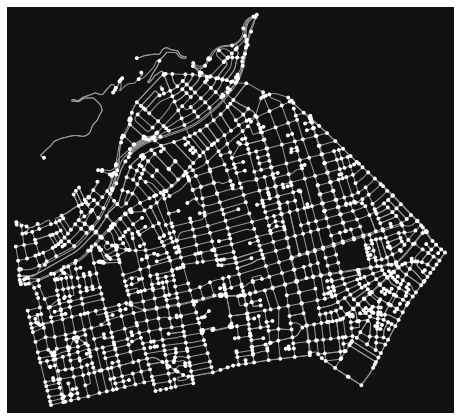

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
#Plot the streets
ox.plot_graph(graph)

¡Excelente! Ahora podemos ver que nuestro gráfico contiene nodos (los puntos) y bordes (las líneas) que conectan esos nodos entre sí.

# Graficar a GeoDataFrame

Ahora podemos trazar todas estas diferentes capas de OSM usando la plot()función familiar de Geopandas. Como recordará, los datos de la red de calles no son un GeoDataFrame, sino un objeto gráfico. Afortunadamente, OSMnx proporciona una función conveniente graph_to_gdfs()que puede convertir el gráfico en dos GeoDataFrames separados donde el primero contiene la información sobre los nodos y el segundo sobre el borde.

Extraigamos los nodos y los bordes del gráfico como GeoDataFrames:

In [10]:
nodes, edges = ox.graph_to_gdfs(graph)

In [11]:
nodes.columns

Index(['y', 'x', 'osmid', 'highway', 'ref', 'geometry'], dtype='object')

In [12]:
edges.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'length', 'geometry',
       'maxspeed', 'access', 'bridge', 'service', 'tunnel', 'junction', 'ref',
       'u', 'v', 'key'],
      dtype='object')

y longitud, x latitud

In [80]:
nodes

,y,x,osmid,highway,ref,geometry
388703,-33.446719,-70.627444,388703,NaN,NaN,POINT (-70.62744 -33.44672)
388705,-33.447429,-70.632149,388705,traffic_signals,NaN,POINT (-70.63215 -33.44743)
388713,-33.436870,-70.633017,388713,NaN,NaN,POINT (-70.63302 -33.43687)
13876993,-33.441482,-70.625170,13876993,NaN,NaN,POINT (-70.62517 -33.44148)
13876995,-33.439831,-70.618300,13876995,traffic_signals,NaN,POINT (-70.61830 -33.43983)
...,...,...,...,...,...,...
8301072282,-33.430826,-70.614011,8301072282,NaN,NaN,POINT (-70.61401 -33.43083)
8301562433,-33.434952,-70.625529,8301562433,NaN,NaN,POINT (-70.62553 -33.43495)
8301562443,-33.435036,-70.625036,8301562443,NaN,NaN,POINT (-70.62504 -33.43504)
8319732279,-33.436218,-70.627373,8319732279,NaN,NaN,POINT (-70.62737 -33.43622)


In [83]:
nodes[nodes['y'] == -33.435036]

,y,x,osmid,highway,ref,geometry


In [78]:
nodes['x']

388703       -70.627444
388705       -70.632149
388713       -70.633017
13876993     -70.625170
13876995     -70.618300
                ...    
8301072282   -70.614011
8301562433   -70.625529
8301562443   -70.625036
8319732279   -70.627373
8319732292   -70.626631
Name: x, Length: 1606, dtype: float64

In [64]:
for col in nodes.columns:
    print(col)


y
x
osmid
highway
ref
geometry


In [10]:
nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
edges.head()

,osmid,oneway,name,highway,length,geometry,maxspeed,lanes,bridge,width,junction,access,ref,u,v,key
0,231355410,True,Avenida Vicuña Mackenna,primary,119.559,"LINESTRING (-70.61909 -33.48571, -70.61936 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14760647,6058741489,0
1,447885513,True,Avenida Vicuña Mackenna,primary,207.402,"LINESTRING (-70.61236 -33.50826, -70.61264 -33...",40,NaN,NaN,NaN,NaN,NaN,NaN,16106390,5703399254,0
2,25927352,False,Alejandro Avalos,residential,40.741,"LINESTRING (-70.58445 -33.47353, -70.58453 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16967600,282823379,0
3,8000580,True,Rodrigo de Araya,secondary,272.104,"LINESTRING (-70.58445 -33.47353, -70.58415 -33...",NaN,2,NaN,NaN,NaN,NaN,NaN,16967600,206410486,0
4,"[442680912, 15090115, 442680911]",True,Avenida Monseñor Carlos Casanueva,secondary,54.384,"LINESTRING (-70.60741 -33.49555, -70.60738 -33...",NaN,2,yes,NaN,NaN,NaN,NaN,148808239,148849142,0


In [46]:
a = edges[edges['name'] == 'Avenida Providencia']
a

,osmid,oneway,lanes,name,highway,length,geometry,maxspeed,access,bridge,service,tunnel,junction,ref,u,v,key
4,"[201704217, 449631293]",True,4,Avenida Providencia,primary,197.242,"LINESTRING (-70.63302 -33.43687, -70.63292 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,388713,130018881,0
11,461206861,True,3,Avenida Providencia,primary,155.001,"LINESTRING (-70.60424 -33.41930, -70.60282 -33...",50,NaN,NaN,NaN,NaN,NaN,NaN,13877004,336193609,0
15,442446179,True,4,Avenida Providencia,primary,99.826,"LINESTRING (-70.60984 -33.42181, -70.60992 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13877010,13885182,0
102,280517306,True,4,Avenida Providencia,primary,87.193,"LINESTRING (-70.62649 -33.43375, -70.62637 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13882176,247283859,0
150,442446179,True,4,Avenida Providencia,primary,52.839,"LINESTRING (-70.61070 -33.42235, -70.61084 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13885182,224569598,0
177,39928380,True,4,Avenida Providencia,primary,52.741,"LINESTRING (-70.63518 -33.43727, -70.63505 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16106539,4393649854,0
183,449485952,True,4,Avenida Providencia,primary,89.082,"LINESTRING (-70.62929 -33.43544, -70.62855 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59712573,133350020,0
185,448969939,True,6,Avenida Providencia,primary,34.545,"LINESTRING (-70.62423 -33.43168, -70.62404 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59712652,282394774,0
186,442446179,True,4,Avenida Providencia,primary,58.239,"LINESTRING (-70.61248 -33.42359, -70.61290 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59712719,224569497,0
189,305802801,True,4,Avenida Providencia,primary,121.920,"LINESTRING (-70.61471 -33.42561, -70.61489 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59712720,224552407,0


¡Agradable! Ahora, como podemos ver, tenemos nuestro gráfico como GeoDataFrames y podemos trazarlos usando las mismas funciones y herramientas que hemos usado antes.

In [51]:
a[a['osmid']==448969939]

,osmid,oneway,lanes,name,highway,length,geometry,maxspeed,access,bridge,service,tunnel,junction,ref,u,v,key
185,448969939,True,6,Avenida Providencia,primary,34.545,"LINESTRING (-70.62423 -33.43168, -70.62404 -33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59712652,282394774,0


# Colocar polígono 

Tracemos también el polígono que representa nuestra área de interés (Macul, Santiago). Podemos recuperar la geometría del polígono usando la función [geocode_to_gdf ()] (https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf (# osmnx.geocoder.geocode_to_gdf) -función.

**osmnx.geocoder.geocode_to_gdf( consulta , which_result = Ninguno , buffer_dist = Ninguno )**

In [12]:
area = ox.geocode_to_gdf(place_name)

Como ya nos dice el nombre de la función, gdf_from_place()devuelve un GeoDataFrame basado en la consulta del nombre del lugar especificado. Todavía verifiquemos el tipo de datos:

In [13]:
type(area)

geopandas.geodataframe.GeoDataFrame

In [14]:
area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-70.62298 -33.47495, -70.62068 -33.4...","Macul, Provincia de Santiago, Santiago Metropo...",-33.469933,-33.510417,-70.576651,-70.622984


<AxesSubplot:>

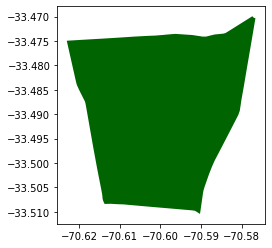

In [15]:
area.plot(facecolor='darkgreen')

# Construyendo huellas

También es posible recuperar otros tipos de características de datos de OSM con OSMnx, como edificios o puntos de interés (POI). Descarguemos los edificios con la función OSMnx geometries_from_place () y trazémoslos encima de nuestra red de calles en Kamppi.

Nota: en las versiones de OSMnx <0.9, usamos el buildings_from_placemétodo para recuperar huellas de edificios.

Al obtener tipos específicos de geometrías de OpenStreetMap usando OSMnx geometries_from_place, también necesitamos especificar las etiquetas correctas. Para obtener todo tipo de edificios , podemos usar la etiqueta building=yes.

In [16]:
# List key-value pairs for tags
tags = {'building': True}

In [17]:
buildings0 = ox.footprints_from_place(place_name, footprint_type='building')
buildings = ox.geometries_from_place(place_name, {'building': True})

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\osmnx\footprints.py:129: UserWarning: The `footprints` module has been deprecated and will be removed in a future release. Instead, use the `geometries` module's `geometries_from_place` function, passing `tags={'building':True}`.
  warnings.warn(msg)


Veamos cuántas huellas de edificios recibimos:

In [18]:
len(buildings)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3994

In [19]:
len(buildings0)

3994

También echemos un vistazo a los datos:

In [20]:
buildings0.head(3)

,unique_id,osmid,element_type,source,geometry,addr:housenumber,addr:street,amenity,nodes,addr:city,...,wall,height,social_facility,social_facility:for,layer,ways,type,designation,internet_access:fee,internet_access:ssid
0,way/39533365,39533365,way,Reconocimiento cortográfico de campo 2016 por KG,"POLYGON ((-70.60050 -33.47413, -70.60046 -33.4...",2127,Avenida Macul,NaN,"[473641512, 7209700689, 473641513, 473641514, ...",Ñuñoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/48431107,48431107,way,NaN,"POLYGON ((-70.61296 -33.49815, -70.61302 -33.4...",NaN,NaN,NaN,"[615091422, 615091423, 6008881510, 615091424, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/48431117,48431117,way,NaN,"POLYGON ((-70.61332 -33.49675, -70.61327 -33.4...",NaN,NaN,university,"[615091475, 1699994795, 1699994811, 615091476,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
buildings.head(3)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,source,geometry,addr:housenumber,addr:street,amenity,nodes,addr:city,...,wall,height,social_facility,social_facility:for,layer,ways,type,designation,internet_access:fee,internet_access:ssid
0,way/39533365,39533365,way,Reconocimiento cortográfico de campo 2016 por KG,"POLYGON ((-70.60050 -33.47413, -70.60046 -33.4...",2127,Avenida Macul,NaN,"[473641512, 7209700689, 473641513, 473641514, ...",Ñuñoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/48431107,48431107,way,NaN,"POLYGON ((-70.61296 -33.49815, -70.61302 -33.4...",NaN,NaN,NaN,"[615091422, 615091423, 6008881510, 615091424, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/48431117,48431117,way,NaN,"POLYGON ((-70.61332 -33.49675, -70.61327 -33.4...",NaN,NaN,university,"[615091475, 1699994795, 1699994811, 615091476,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como puede ver, hay varias columnas en la capa de edificios. Cada columna contiene información sobre una etiqueta específica que han agregado los colaboradores de OpenStreetMap. Cada etiqueta consta de una clave (el nombre de la columna) y varios valores potenciales (por ejemplo, building=yeso building=school). Lea más sobre etiquetas y prácticas de etiquetado en la **wiki de OpenStreetMap**.

In [22]:
buildings.columns

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['unique_id', 'osmid', 'element_type', 'source', 'geometry',
       'addr:housenumber', 'addr:street', 'amenity', 'nodes', 'addr:city',
       'building', 'name', 'shop', 'operator', 'website', 'building:levels',
       'covered', 'leisure', 'sport', 'religion', 'toilets:wheelchair',
       'wheelchair', 'wheelchair:description', 'emergency', 'healthcare',
       'wikipedia', 'denomination', 'phone', 'craft', 'cuisine', 'fixme',
       'office', 'atm', 'capacity', 'smoking', 'delivery', 'clothes', 'brand',
       'fuel:diesel', 'fuel:octane_95', 'fuel:octane_98', 'opening_hours',
       'takeaway', 'brand:wikidata', 'brand:wikipedia', 'service',
       'contact:email', 'school:type', 'alt_name', 'internet_access', 'ele',
       'name:es', 'outdoor_seating', 'payment:cash', 'description',
       'building:colour', 'roof:colour', 'roof:shape', 'wall', 'height',
       'social_facility', 'social_facility:for', 'layer', 'ways', 'type',
       'designation', 'internet_access:fee', 'in

In [23]:
len(buildings.columns)

68

# Puntos de interés

También es posible recuperar otros tipos de geometrías de OSM usando el geometries_from_placepasando diferentes etiquetas. El punto de interés (POI) es un concepto genérico que describe ubicaciones de puntos que representan lugares de interés.

En OpenStreetMap, muchos PDI se describen mediante las etiquetas de amenity . Podemos, por ejemplo, recuperar todas las ubicaciones de los restaurantes haciendo referencia a la etiqueta amenity=restaurant. Vea todas las categorías de servicios disponibles en la wiki de OSM .

Nota: Usamos el pois_from_place()método para recuperar puntos de interés en versiones anteriores de OSMnx.


**osmnx.pois.pois_from_place( lugar , etiquetas , which_result = None )**

Recuperemos los restaurantes que se encuentran en nuestra área de interés:

In [24]:
# List key-value pairs for tags
tags = {'amenity': 'restaurant'}

In [25]:
restaurants0 = ox.pois_from_place(place_name ,  {'amenity': 'restaurant'})
restaurants = ox.geometries_from_place(place_name, tags)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\osmnx\pois.py:135: UserWarning: The `pois` module has been deprecated and will be removed in a future release. Use the `geometries` module's `geometries_from_place` function instead.
  warnings.warn(msg)


In [26]:
# How many restaurants do we have?
len(restaurants)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


40

Como podemos ver, hay bastantes restaurantes en la zona.

Exploremos qué tipo de atributos tenemos en nuestros restaurantes GeoDataFrame:

In [27]:
# Available columns
restaurants.columns.values

array(['unique_id', 'osmid', 'element_type', 'addr:street', 'amenity',
       'source', 'geometry', 'addr:city', 'capacity', 'cuisine', 'name',
       'phone', 'smoking', 'addr:housenumber', 'outdoor_seating', 'nodes',
       'building', 'building:levels', 'fixme', 'delivery',
       'internet_access', 'takeaway'], dtype=object)

Como puede ver, hay bastante información (potencial) relacionada con las comodidades. Hagamos subconjuntos de las columnas e inspeccionemos los datos más a fondo. Columnas útiles incluyen al menos name, y la información:address information delivery

In [28]:
cols = ['name', 'addr:street', 'addr:city', 'addr:housenumber', 'delivery']

restaurants[cols].head(5)

,name,addr:street,addr:city,addr:housenumber,delivery
0,NaN,Avenida Escuela Agrícola,NaN,NaN,NaN
1,El Puro Perú,Avenida Macul,Macul,NaN,NaN
2,La Fuente Criolla,Ramon Toro Ibañez,Macul,5088,NaN
3,Comida China Cantones,Las Codornices,NaN,NaN,NaN
4,Xin Chun,Froilán Roa,NaN,NaN,NaN


Como podemos ver, hay mucha información útil sobre restaurantes que se puede recuperar fácilmente con OSMnx. Además, si es necesario actualizar parte de la información, puede visitar www.openstreetmap.org y editar los datos de origen. :)

# Trazando los datos

Creemos un mapa de las calles, edificios, restaurantes y el área Polígono, pero excluyamos los nodos (para mantener la figura más clara).

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


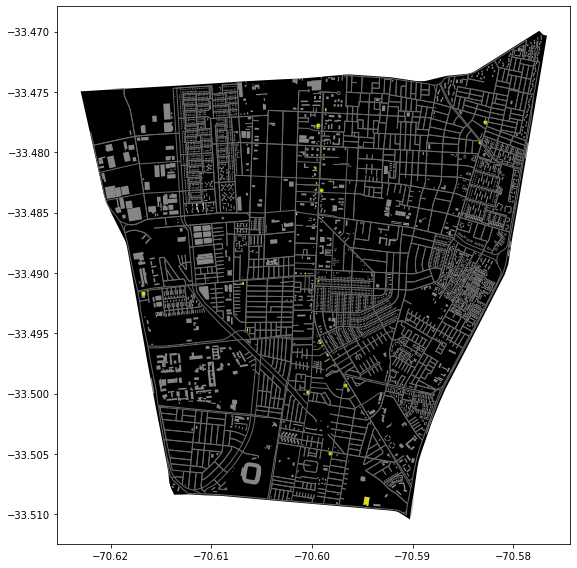

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the footprint
area.plot(ax=ax, facecolor = "black")

#Plot street edges
edges.plot(ax=ax, linewidth = 1, edgecolor='dimgray')

#Plot buildings
buildings.plot(ax=ax, facecolor= "silver", alpha=0.7)#transparencia

#Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

Ahora tenemos un mapa donde hemos trazado los restaurantes, edificios, calles y los límites de la región seleccionada de 'Macul' en Santiago. Y todo esto requirió solo unas pocas líneas de código. ¡Con buena pinta!

# Extra: polígonos de parque 

Observe que podemos recuperar todo tipo de características diferentes de OpenStreetMap usando el método geometries_from_place () pasando diferentes etiquetas de OpenStreetMap.

Tratemos de buscar todos los parques públicos en el área de Macul. En OpenStreetMap, los parques a menudo se etiquetan como leisure=park. También podemos añadir otras superficies verdes, como landuse=grass. consulte OpenStreetMap y OSM wiki para obtener más detalles.

Necesitamos comenzar por obtener todas las huellas de la etiqueta leisure:

In [30]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Get the data
parks = ox.geometries_from_place(place_name, {'leisure': 'park', 'landuse': 'grass'})

# Check the result
print("Retrieved", len(parks), "objects")

Retrieved 253 objects


revisemos las primeras filas:

In [32]:
parks.head(3)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,name,source,geometry,leisure,nodes,landuse,description,ways,type
0,node/4448528067,4448528067,node,NaN,Reconocimiento cortográfico de campo 2016 por KG,POINT (-70.60674 -33.49509),park,NaN,NaN,NaN,NaN,NaN
1,way/24742845,24742845,way,Plaza Trizano,NaN,"POLYGON ((-70.60619 -33.48646, -70.60533 -33.4...",park,"[268900575, 268900576, 268900577, 268900579, 2...",NaN,NaN,NaN,NaN
2,way/25352033,25352033,way,Plaza Juan Rens Peeters (ex Guatemala),NaN,"POLYGON ((-70.59387 -33.49129, -70.59366 -33.4...",park,"[276282337, 5614677618, 5614677619, 276282632,...",NaN,NaN,NaN,NaN


Verifique todos los encabezados de columna:

In [33]:
parks.columns.values

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['unique_id', 'osmid', 'element_type', 'name', 'source', 'geometry',
       'leisure', 'nodes', 'landuse', 'description', 'ways', 'type'],
      dtype=object)

trazar los parques:

<AxesSubplot:>

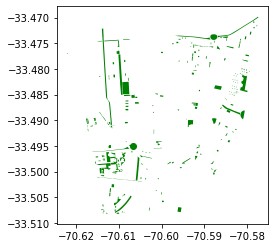

In [34]:
parks.plot(color="green")

Finalmente, podemos agregar los polígonos del parque a nuestro mapa:

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


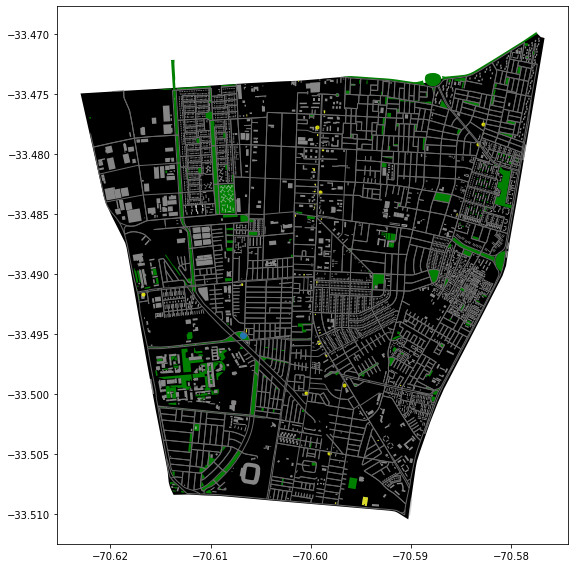

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

# Proyectamos de coordenadas en latlong a utm

Las proyecciones se utilizan para codificar las coordenadas de la tierra al plano. Existen varios formatos para almacenar esta información. Si observan el órden de magnitud de la coordenadas presentes dentro de los objetos de la columna geometry verán que para las líneas de metro tenemos número del órden -33, -70 (Coordenadas Lat Long - las que usa GoogleMaps) y en los distritos se manejan otro tipo de números (Coordenadas UTM). Esa es la razón por la que la visualización conjunta no funcionó. 

Lo que nos interesa de estas líneas, es el código junto a EPSG en la primera línea. Este es el código de la proyección utilizada. Podemos notar que el archivo de distritos posee un EPSG 32719 mientras que el de las líneas de metro es EPSG 4326.

El EPSG 32719 (Coordenadas UTM) es ampliamente utilizado en Chile por su bajo nivel de error al proyectar las coordenadas de la tierra al plano. La gran ventaja de este sistema de coordenadas es que las distancias entre dos puntos cualesquiera es en metro, lo que facilita el trabajo.

El EPSG 4326 es un sistema universal basado en grados, es decir, se mide en grados de latitud y grados de longitud. Es ampliamente utilizado a nivel mundial, pero es importante mencionar que las distancias esta en grados por lo que es una medida que facilite el trabajo en mapas.

In [36]:
area.crs

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
from pyproj import CRS
#Set projection
projection = CRS.from_epsg(32719)

# Re-project Layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
nodes = nodes.to_crs(projection)
restaurants = restaurants.to_crs(projection)
buildings = buildings.to_crs(projection)
parks = parks.to_crs(projection)

In [38]:
area.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

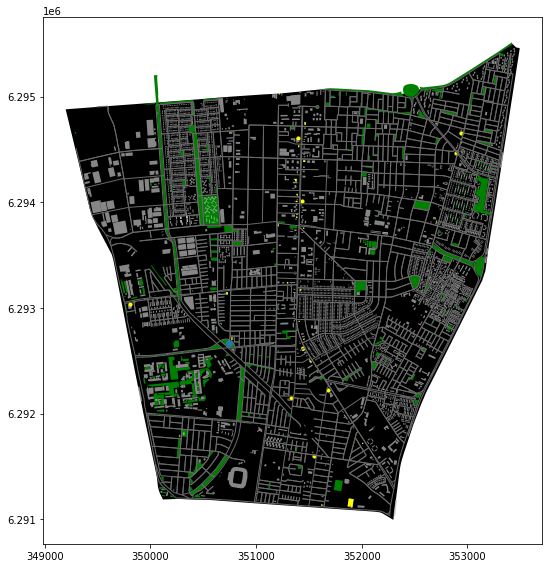

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the footprint
area.plot(ax=ax, facecolor = "black")

#Plot the parks
parks.plot(ax=ax, facecolor = "green")

#Plot street edges
edges.plot(ax=ax, linewidth = 1, edgecolor = "dimgray")

#Plot buildings
buildings.plot(ax=ax, facecolor= "silver", alpha=0.7)#transparencia

#Plot restaurants
restaurants.plot(ax=ax, color='yellow', markersize=10)
plt.tight_layout()

# Network analysis in Python

In [40]:
# Check columns
edges.columns

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osmid', 'oneway', 'name', 'highway', 'length', 'geometry', 'maxspeed',
       'lanes', 'bridge', 'width', 'junction', 'access', 'ref', 'u', 'v',
       'key'],
      dtype='object')

Echemos un vistazo a qué tipo de características tenemos en la highwaycolumna:

In [41]:
edges['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential                     3143
living_street                    966
tertiary                         451
secondary                        443
primary                          253
secondary_link                    15
[living_street, residential]      14
primary_link                      12
unclassified                       8
motorway_link                      5
motorway                           4
tertiary_link                      3
[unclassified, residential]        2
Name: highway, dtype: int64

Bien, ahora podemos confirmar que, como resultado, nuestra red de calles de hecho solo contiene aquellas calles en las que está permitido conducir con un automóvil, ya que no hay, por ejemplo, ciclovías o aceras incluidas en los datos.

Como los datos están en formato WGS84, es posible que deseemos volver a proyectar nuestros datos en un sistema métrico antes de proceder al análisis de la ruta más corta. Podemos volver a proyectar el gráfico de latitudes y longitudes a una zona UTM apropiada usando la función project_graph () de OSMnx.

In [42]:
graph_proj = ox.project_graph(graph)

In [43]:
type(graph_proj)

networkx.classes.multidigraph.MultiDiGraph

In [44]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj)

In [45]:
edges_proj.crs

<Projected CRS: +proj=utm +zone=19 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 19N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
CRS(edges_proj.crs).to_epsg()

32619

# Analizando las propiedades de la red

Ahora que hemos visto algunas de las funcionalidades básicas de OSMnx, como descargar los datos y convertir los datos de un gráfico a GeoDataFrame, podemos echar un vistazo a algunas de las características analíticas de omsnx. Osmnx incluye muchas funcionalidades útiles para extraer información sobre la red.

Para calcular algunas de las medidas básicas de la red de calles, podemos usar la función basic_stats () en OSMnx:

Estadísticas para comparar dos zonas urbanas

**osmnx.stats.basic_stats( G , area = None , clean_intersects = False , tolerancia = 15 , circuity_dist = 'gc' )**

In [47]:
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'n': 2079,
 'm': 5319,
 'k_avg': 5.116883116883117,
 'intersection_count': 1760,
 'streets_per_node_avg': 2.8965848965848964,
 'streets_per_node_counts': {0: 0, 1: 319, 2: 1, 3: 1338, 4: 418, 5: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.15343915343915343,
  2: 0.000481000481000481,
  3: 0.6435786435786436,
  4: 0.20105820105820105,
  5: 0.001443001443001443},
 'edge_length_total': 407409.8009999981,
 'edge_length_avg': 76.59518725324274,
 'street_length_total': 235203.29699999976,
 'street_length_avg': 78.87434507042245,
 'street_segments_count': 2982,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0279317612115118,
 'self_loop_proportion': 0.0005640157924421884,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

Para poder extraer las estadísticas más avanzadas (y algunas de las que faltan arriba) de la red de calles, se requiere tener información sobre el área de cobertura de la red. Calculemos el área del casco convexo de la red de calles y veamos qué podemos obtener.

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


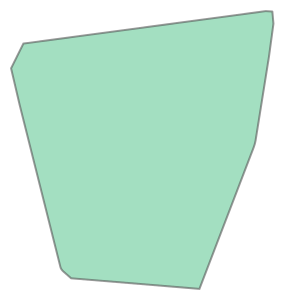

In [48]:
#Get the convex hll of the network
convex_hull = edges_proj.unary_union.convex_hull
#Show output
convex_hull

Ahora podemos usar el casco convexo anterior para calcular estadísticas extendidas para la red . Como algunas de las métricas se producen por separado para cada nodo, producen una gran cantidad de resultados. Aquí, combinamos las estadísticas básicas y extendidas en una serie de pandas para mantener las cosas en una forma más compacta.

In [49]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value
    
# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                                   2079
m                                                                                   5319
k_avg                                                                            5.11688
intersection_count                                                                  1760
streets_per_node_avg                                                             2.89658
streets_per_node_counts                      {0: 0, 1: 319, 2: 1, 3: 1338, 4: 418, 5: 3}
streets_per_node_proportion            {0: 0.0, 1: 0.15343915343915343, 2: 0.00048100...
edge_length_total                                                                 407410
edge_length_avg                                                                  76.5952
street_length_total                                                               235203
street_length_avg                                                                78.8743
street_segments_count

Como podemos ver, ahora tenemos MUCHA información sobre nuestra red de calles que se puede utilizar para comprender su estructura. Por ejemplo, podemos ver que la densidad de nodos promedio en nuestra red es y que la longitud total del borde de nuestra red es de aprox. 407 kilómetros.155 nodes/km

Además, podemos ver que el grado de centralidad de nuestra red es en promedio  0.00246241. El grado es una medida de centralidad simple que cuenta cuántos vecinos tiene un nodo (aquí, una fracción de los nodos a los que está conectado). Otra medida interesante es el PageRank que mide la importancia de un nodo específico en el gráfico. Aquí podemos ver que el nodo más importante de nuestro gráfico parece un nodo con osmid 266099080. PageRank fue el algoritmo que Google desarrolló por primera vez (Larry Page y Sergei Brin) para ordenar los resultados del motor de búsqueda y por el que se hizo famoso.

Puede leer el artículo de Wikipedia sobre diferentes medidas de centralidad si está interesado en lo que significan las otras medidas de centralidad.

# Análisis de la ruta más corta

Calculemos ahora la ruta más corta entre dos puntos usando la función de ruta más corta en Networkx .

# Puntos de origen y destino 

Primero necesitamos especificar las ubicaciones de origen y destino para nuestra ruta. Si está familiarizado con el área de Macul, puede especificar un nombre de lugar personalizado como ubicación de origen. O puede elegir entre estas opciones:

La PUC

Podríamos averiguar las coordenadas para estas ubicaciones manualmente y crear puntos bien formados basados ​​en las coordenadas. Sin embargo, es **más útil buscar la ubicación de nuestro destino de origen directamente desde OSM**:

In [50]:
place = "Pontificia Universidad Católica de Chile (Campus San Joaquín)"

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Geocode the place name
geocoded_place = ox.geocode_to_gdf(place)

In [52]:
geocoded_place

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-70.61628 -33.49613, -70.61584 -33.4...",Pontificia Universidad Católica de Chile (Camp...,-33.495554,-33.501658,-70.605854,-70.61628


Como resultado, recibimos la huella del edificio. Desde aquí, podemos obtener el centroide como la ubicación de origen de nuestro análisis de ruta más corta. Sin embargo, primero necesitamos proyectar los datos en el crs correcto:

In [53]:
# Re-project 
geocoded_place.to_crs(CRS(edges_proj.crs), inplace=True)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Get centroid as shapely point
origin = geocoded_place["geometry"].centroid.values[0]

In [55]:
print(origin)

POINT (350372.5288355682 -3707727.474709295)


¡Excelente! Ahora hemos definido el punto de origen de nuestro análisis en algún lugar del área de interés. A continuación, todavía necesitamos la ubicación de destino. Para simplificar las cosas, podemos establecer el nodo más al este de nuestra red de carreteras como destino. Echemos otro vistazo a nuestros datos de nodos:

In [56]:
nodes_proj.head()

,y,x,osmid,highway,lon,lat,ref,geometry
14760647,-3.706308e+06,349577.624523,14760647,traffic_signals,-70.619090,-33.485714,NaN,POINT (349577.625 -3706308.154)
6058741489,-3.706215e+06,349503.506895,6058741489,NaN,-70.619872,-33.484861,NaN,POINT (349503.507 -3706214.657)
16106390,-3.708799e+06,350241.766025,16106390,traffic_signals,-70.612360,-33.508262,NaN,POINT (350241.766 -3708798.642)
5703399254,-3.708658e+06,350090.399617,5703399254,NaN,-70.613966,-33.506969,NaN,POINT (350090.400 -3708657.607)
16967600,-3.704908e+06,352776.026246,16967600,NaN,-70.584445,-33.473534,NaN,POINT (352776.026 -3704907.884)


Podemos encontrar los nodos más al este según las coordenadas x:

In [57]:
# Retrieve the maximum x value (i.e. the most eastern)
maxx = nodes_proj['x'].max()

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Averigüemos las geometrías de puntos correspondientes para estos nodos. Podemos hacer esto usando la función .loc de Pandas que ya hemos usado muchas veces en tutoriales anteriores.

In [58]:
# Easternmost point
destination = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(destination)

POINT (353431.4778254005 -3704785.043958055)


# Nodo más cercano

Busquemos ahora los nodos de gráficos más cercanos (y sus ID de nodo) a estos puntos usando OSMnx get_nearest_node. Como punto de partida, tenemos los dos objetos Shapely Point que acabamos de definir como las ubicaciones de origen y destino. De acuerdo con la documentación de esta función, necesitamos analizar las coordenadas de los puntos como tuplas de coordenadas en este orden: latitud, longitud (o y, x). Como nuestros datos ahora se proyectan a la proyección UTM, necesitamos especificar con el parámetro de método que la función usa distancias 'euclidianas' para calcular la distancia desde el punto hasta el nodo más cercano (con derees decimales, use 'haversine', que determina la gran -distancias circulares). El parámetro del método es importante si desea conocer la distancia real entre el Punto y el nodo más cercano que puede recuperar especificando el parámetro return_dist = True.

In [59]:
# Get origin x and y coordinates
orig_xy = (origin.y, origin.x)

# Get target x and y coordinates
target_xy = (destination.y, destination.x)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node_id = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node_id

466529763

In [61]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node_id = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node_id

605182828

Ahora tenemos los ID de los nodos más cercanos que se encontraron en el gráfico a los puntos de origen y destino que especificamos. Recuperemos la información del nodo del node_proj GeoDataFrame pasando los identificadores al indexador de locomotoras

In [62]:
# Retrieve the rows from the nodes GeoDataFrame based on the node id (node id is the index label)
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

También creemos un GeoDataFrame que contenga estos puntos

In [63]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([orig_node, target_node], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,osmid,highway,lon,lat,ref,geometry
466529763,-3.708025e+06,350306.827738,466529763,NaN,-70.611531,-33.501293,NaN,POINT (350306.828 -3708024.711)
605182828,-3.704785e+06,353431.477825,605182828,NaN,-70.577373,-33.472516,NaN,POINT (353431.478 -3704785.044)


Bien, como resultado, ahora obtuvimos los ID de nodo más cercanos de nuestras ubicaciones de origen y destino. Como puede ver, el índice en este GeoDataFrame corresponde a los ID que encontramos con la función get_nearest_node ().

# Arco más cercano a cada punto
Al igual que anteriormente, podemos encontrar el arco más cercano a cada punto (lista de puntos), donde setorna una matriz con cada arco más cercano a cada punto entregado como input.

In [64]:
ox.distance.get_nearest_edges(graph, [350372.5288355682, 353431.4778254005], [3707727.474709295,-3704785.043958055], method=None, dist=0.0001)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 282823440, 2232342787,          1],
       [ 474938950, 3559317183,          0]], dtype=int64)

# Rutas

Ahora estamos listos para hacer el enrutamiento y encontrar la ruta más corta entre las ubicaciones de origen y destino usando la función shortest_path () de networkx. Con el parámetro de peso, podemos especificar que el atributo 'longitud' debe usarse como la impedancia de costo en el enrutamiento. Si especifica el parámetro de peso, NetworkX utilizará por defecto el algoritmo de Dijkstra para encontrar la ruta óptima. Necesitamos especificar el gráfico que se utiliza para el enrutamiento, y se calculará la ID de origen (fuente) y la ID de destino entre la ruta más corta:

In [65]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node_id, target=target_node_id, weight='length')
# Show what we have
print(route)

[466529763, 427971059, 427971060, 427971061, 427971062, 265682296, 4429341167, 4429341166, 3684165532, 3684165531, 605172385, 4431703627, 148849202, 148849201, 3898519857, 2270218183, 2028217446, 457755916, 457755919, 457755876, 515257424, 515257517, 515257159, 276282406, 276283224, 457755941, 276282813, 738124058, 276282457, 276282459, 276282913, 738124061, 276284077, 4505207170, 276284548, 421907946, 276282293, 206410474, 276284440, 276284413, 206410460, 206410452, 605173421, 605182534, 421893565, 605182532, 4401546398, 421893566, 268899515, 4505336470, 421893567, 4401546381, 421893568, 4401546352, 421893569, 421893570, 6865311255, 605182644, 266099785, 206410479, 206410480, 4505336458, 282823529, 282823535, 282824051, 282823520, 282823638, 282823687, 282823597, 282823660, 7441040126, 282823742, 282824027, 282824025, 282824023, 282824022, 282823725, 7441040156, 282823381, 282824006, 282823920, 282823462, 282823998, 282823436, 282823922, 282823440, 605182828]


Como resultado, obtenemos una lista de todos los nodos que se encuentran en el camino más corto. Podríamos extraer las ubicaciones de esos nodos del node_proj GeoDataFrame y crear una presentación LineString de los puntos, pero afortunadamente, OSMnx puede hacer eso por nosotros y podemos trazar la ruta más corta usando la función plot_graph_route ():

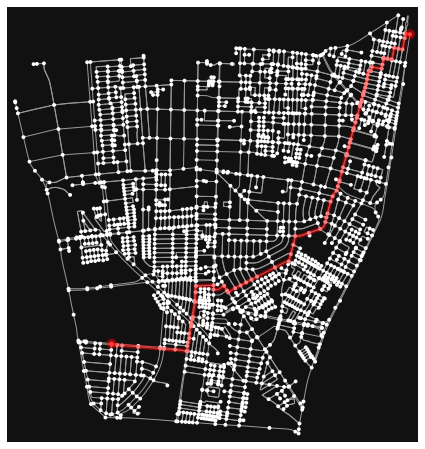

In [66]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)

¡Agradable! Ahora tenemos el camino más corto entre nuestras ubicaciones de origen y destino. Poder analizar las rutas más cortas entre ubicaciones puede ser información valiosa para muchas aplicaciones. Aquí, solo analizamos los caminos más cortos en función de la distancia, pero a menudo es más útil encontrar las rutas óptimas entre ubicaciones en función del tiempo de viaje. Aquí, por ejemplo, podríamos calcular el tiempo que se tarda en cruzar cada segmento de carretera dividiendo la longitud del segmento de carretera con el límite de velocidad y calcular las rutas óptimas teniendo en cuenta también los límites de velocidad que podrían alterar el resultado, especialmente en viajes más largos que aquí.

La distancia euclidiana entre el origen y destino es:

In [67]:
ox.distance.euclidean_dist_vec(350372.5288355682, -3707727.474709295, 353431.4778254005, -3704785.043958055)

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4244.416055035201

Además, podemos encontrar **varias rutas a lo largo de un grafo** (distintos pares OD), como se muestra a continuación:

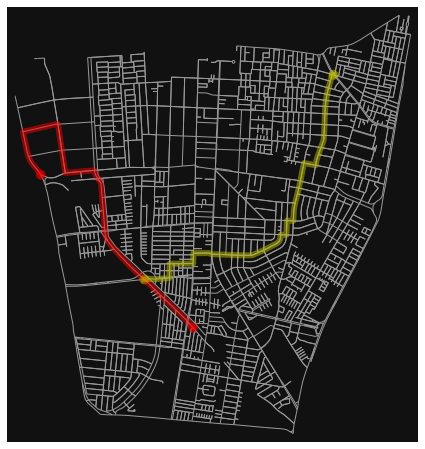

In [68]:
G = graph
orig1 = list(G.nodes())[0]
dest1 = list(G.nodes())[1500]
orig2 = list(G.nodes())[3]
dest2 = list(G.nodes())[7]

# calculate shortest paths for the 2 routes
route1 = nx.shortest_path(G, orig1, dest1, weight='length')
route2 = nx.shortest_path(G, orig2, dest2, weight='length')
routes = [route1, route2]
rc = ['r', 'y']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)

Por otro lado, podemos encontrar las **k rutas más cortas** para un mismo par OD, Retorna un generador de k rutas más cortas, ordenadas por "peso" total. Cada ruta es una lista de ID de nodo..

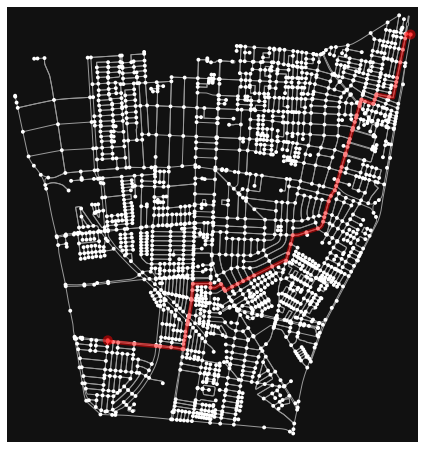

5729.559000000002


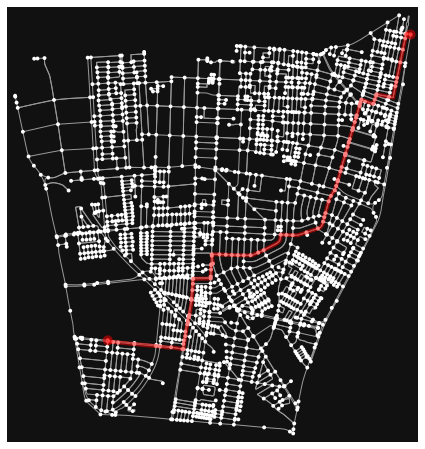

5733.265000000003


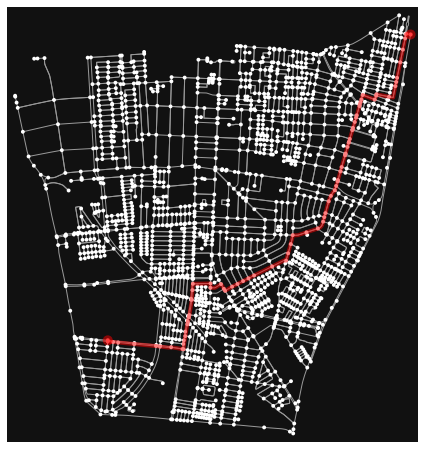

5733.788000000001


In [78]:
k_rutas = ox.distance.k_shortest_paths(graph, 466529763, 605182828, k=3, weight='length')
#k=3
#for counter, path in enumerate(k_rutas):
#    print(path)
#    if counter == k-1:
#         break

for path in k_rutas:
    length = sum(ox.utils_graph.get_route_edge_attributes(G, path, 'length'))
   
    fig, ax = ox.plot_graph_route(G, path)
    print(length)
    #ox.plot_graph_routes(G, path)
# me devuelve un generador, but no sé bien cómo funcionan (?)

# Agregar atributos a una ruta

In [70]:
ox.utils_graph.get_route_edge_attributes(graph, route1, attribute=None, minimize_key='length', retrieve_default=None)
# lo podemos ver aquí:

[{'osmid': 231355410,
  'oneway': True,
  'name': 'Avenida Vicuña Mackenna',
  'highway': 'primary',
  'length': 119.559,
  'geometry': <shapely.geometry.linestring.LineString at 0x1eed60a0b48>},
 {'osmid': 231355410,
  'oneway': True,
  'name': 'Avenida Vicuña Mackenna',
  'highway': 'primary',
  'length': 111.942,
  'geometry': <shapely.geometry.linestring.LineString at 0x1eed5f9df08>},
 {'osmid': 231355410,
  'oneway': True,
  'name': 'Avenida Vicuña Mackenna',
  'highway': 'primary',
  'length': 265.23199999999997,
  'geometry': <shapely.geometry.linestring.LineString at 0x1eed6096248>},
 {'osmid': 24475685,
  'oneway': True,
  'name': 'Domingo Arteaga',
  'highway': 'residential',
  'length': 376.58799999999997,
  'geometry': <shapely.geometry.linestring.LineString at 0x1eed608ae48>},
 {'osmid': 24475676,
  'name': 'Til Til',
  'highway': 'residential',
  'oneway': False,
  'length': 274.363},
 {'osmid': 24475676,
  'name': 'Til Til',
  'highway': 'residential',
  'oneway': False,

# Agregar tiempos y distancias (Grafo)

In [71]:
# agregamos velocidad
ox.speed.add_edge_speeds(graph, hwy_speeds=None, fallback=None, precision=1)

In [72]:
# agregamos distancia
ox.utils_graph.add_edge_lengths(graph, precision=3)

In [73]:
# ahora que tenemos velocidad y distancia podemos agregar los tiempos de viaje :)
ox.speed.add_edge_travel_times(graph, precision=1)

# Colores basados en valores de atributos de arco
Devuelve pandas.series donde las etiquetas de la serie son ID de arco (u, v, k) y los valores son colores

C:\Users\Anaís\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


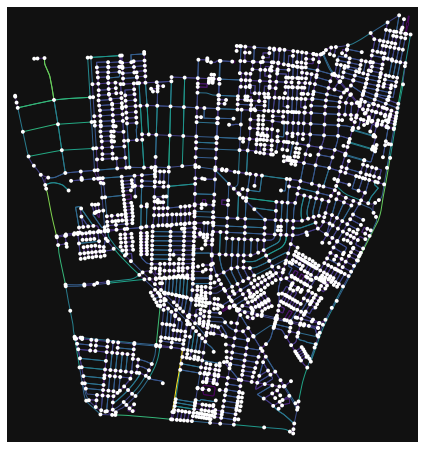

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [79]:
colors = ox.plot.get_edge_colors_by_attr(graph, 'travel_time')
ox.plot_graph(graph, edge_color=colors)

# Simplificar grafos

In [75]:
# graph_simple = graph.copy()
# ox.simplification.simplify_graph(graph_simple, strict=True, remove_rings=True)
# ya está simplificado con respecto a los nodos cercanos

In [76]:
gs = ox.simplification.consolidate_intersections(graph_simple, tolerance = 0.5, rebuild_graph = True , dead_ends = False , reconnect_edges = True )
ox.plot_graph(gs)
# xd jajajaj

NameError: name 'graph_simple' is not defined

# Solicitud HTTP POST a la API Overpass y devuelva una respuesta JSON.
No me salió y no encontré documentación sobre este módulo uww
- No entiendo el parámetro de entrada 'params' qué es? un par de parámetros pero de qué?

In [ ]:
# ox.downloader.nominatim_request(params, request_type='search', pause=1, error_pause=60)

In [ ]:
# osmnx.downloader.nominatim_request( params , request_type = 'search' , pause = 1 , error_pause = 60 )